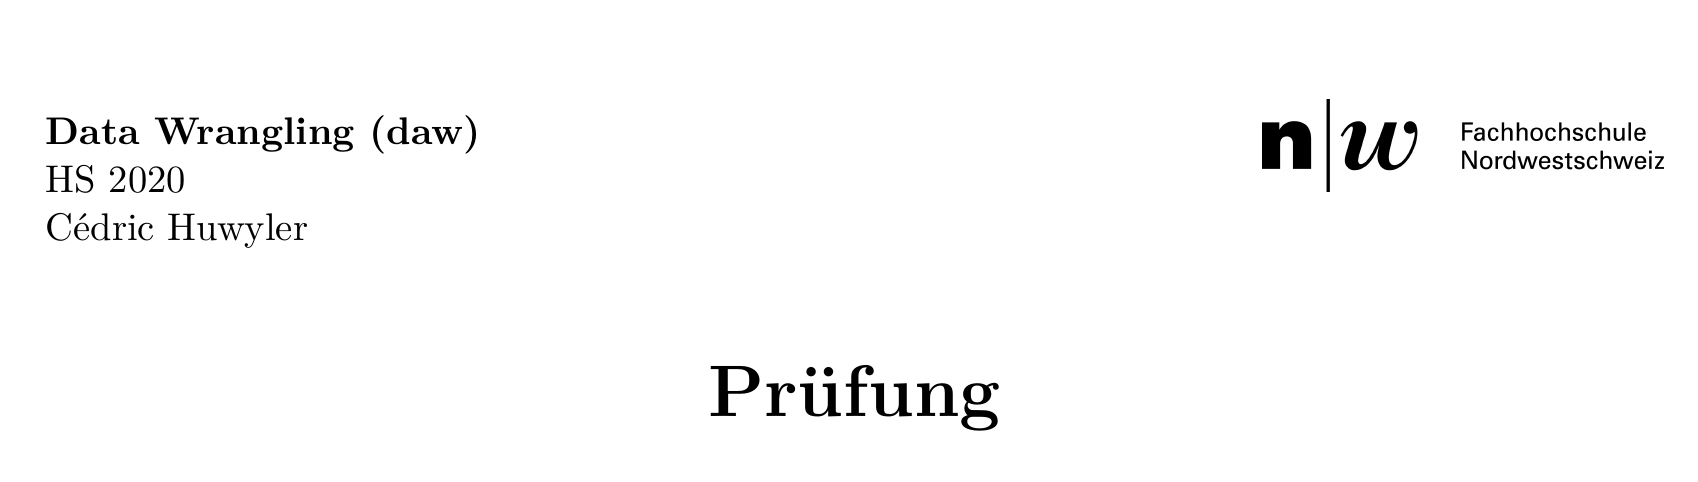

Versionsinfo über Pandas, Numpy und Scikit-Learn:

In [18]:
import pandas as pd
import numpy as np
import sklearn.impute as impute
import matplotlib.pyplot as plt
import seaborn as sns
import json
#print("Pandas {}".format(pd.__version__))
#print("Numpy {}".format(np.__version__))
#print("Scikit-Learn {}".format(sklearn.__version__))

## Aufgabe 1: Data Wrangling Basics (27 Punkte)

In der Datei `'tips.csv'` finden Sie einen Datensatz mit Erhebungen einer Bar. Darin enthalten sind pro Tisch: totaler Rechnungsbetrag, Trinkgeldbetrag, Angabe Raucher/Nicht-Raucher, Wochentag, Tageszeit und Gruppengrösse.

### a) (1 Punkt)

Importieren Sie das Datenset in ein Data Frame.

In [19]:
df_tip = pd.read_csv('tips.csv')

### b) (6 Punkte)

Beschreiben Sie die Datentypen der verschiedenen Merkmale: Welche sind diskret und welche stetig? Welche der Merkmale davon sind nominal-, ordinal-, intervall- und welche verhältnisskaliert? 

*Hier ist eine schriftliche Antwort erwartet*

### c) (2 Punkte)

Geben Sie ein Beispiel eines stetigen, aber nicht verhältnisskalierten Merkmals an und erklären Sie kurz:

*Hier ist eine schriftliche Antwort erwartet*

### d) (6 Punkte)

Zurück zum erstellten Data Frame. Formatieren Sie die diskreten Variablen wo nötig als *kategorische* Variablen. Dabei soll die Variable im resultierenden Data Frame über die verschiedenen Ausprägungen des Merkmals Bescheid wissen und wo möglich auch die Bedeutung der Ordnungsrelationen $<$ und $>$ verstehen können.

In [20]:
# rename values in columns day to long format
df_tip.day.rename({'Thur': 'Thursday', 'Fri':'Friday', 'Sat':'Saturday', 'Sun':'Sunnday'}, inplace=True)

In [21]:
# convert columns smoker, day, time to categorical variables
df_tip['smoker'] = df_tip['smoker'].astype('category')
df_tip['day'] = df_tip['day'].astype('category')
df_tip['time'] = df_tip['time'].astype('category')

# order the categorical variables
df_tip['smoker'] = df_tip['smoker'].cat.set_categories(['Yes', 'No'], ordered=True)
df_tip['day'] = df_tip['day'].cat.set_categories(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
df_tip['time'] = df_tip['time'].cat.set_categories(['Breakfast', 'Lunch', 'Dinner'], ordered=True)

### e) (6 Punkte)

An welchem Wochentag nahm die Bar durchschnittlich prozentual am meisten Trinkgeld ein? Gib ein informatives Data Frame aus und unterlege deine Antwort mit einem Barplot. Die Wochentage sollen dabei in der korrekten Reihenfolge angeordnet sein.

<AxesSubplot:xlabel='day'>

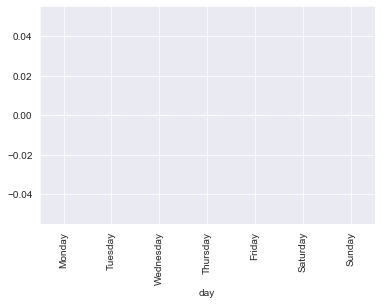

In [22]:
# get the mean of the tip by day of the week
df_tip_mean = df_tip.groupby('day').mean()['tip']

# plot mean tip by day of the week in a bar plot
df_tip_mean.plot(kind='bar')

### f) (6 Punkte)

Wie hängt die prozentuale Trinkgeldhöhe qualitativ mit der Gruppengrösse zusammen? Beurteilen Sie mit einem Boxplot der Trinkgeldhöhe pro Gruppengrösse (alle Boxplots in einem Plot). Geben Sie zur Sicherheit auch die Verteilung der Gruppengrössen an - spielt diese bei Ihrer Beurteilung eine Rolle?

array([[<AxesSubplot:title={'center':'size'}>]], dtype=object)

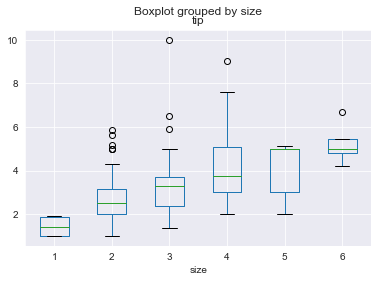

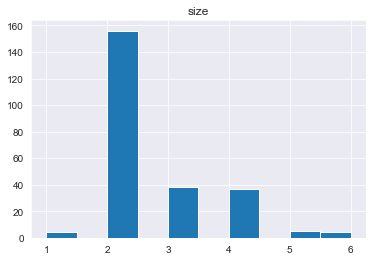

In [23]:
# boxplot of tip by group size
df_tip.boxplot(column='tip', by='size')

# distplot of group size
df_tip.hist(column='size')

## Aufgabe 2: Diabetes-Risiko (27 Punkte)

In den zur Verfügung gestellten Dateien finden Sie die Excel-Datei `'diabetes.xlsx'` mit einem Datenset und einer Beschreibung dazu in den verschiedenen Sheets.

### a) (1 Punkt)

Lesen Sie die Beschreibung und importieren Sie das Datenset in ein Data Frame.

In [24]:
df_diabetes = pd.read_excel('diabetes.xlsx', sheet_name='data')

### b) (7 Punkte)

Enthält das Datenset fehlende Werte? Untersuchen Sie die Wertebereiche der einzelnen Spalten genau. Stellen Sie sicher, dass alle klar erkennbaren fehlenden Werte mit `NaN` auch als solche gekennzeichnet sind. Geben Sie die Anzahl der fehlenden Werte pro Spalte absolut und in Prozent aus.

/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will 

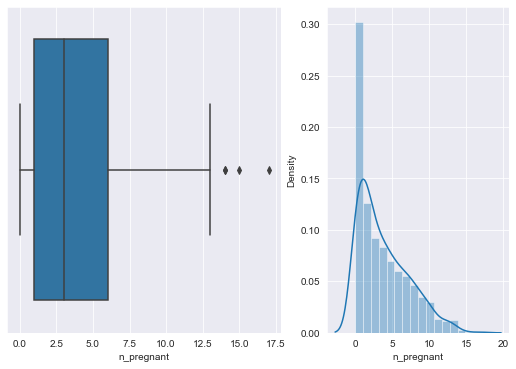

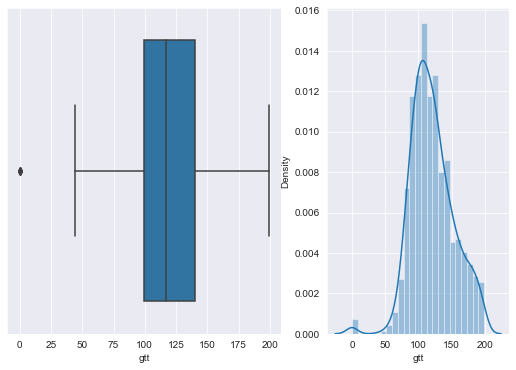

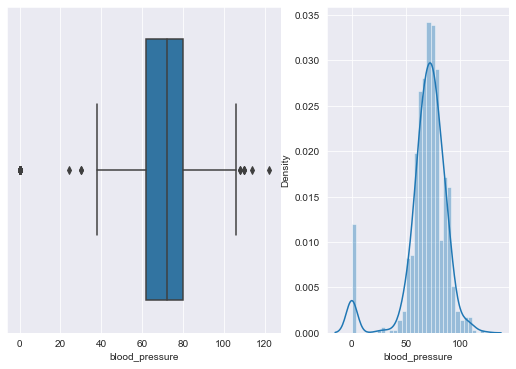

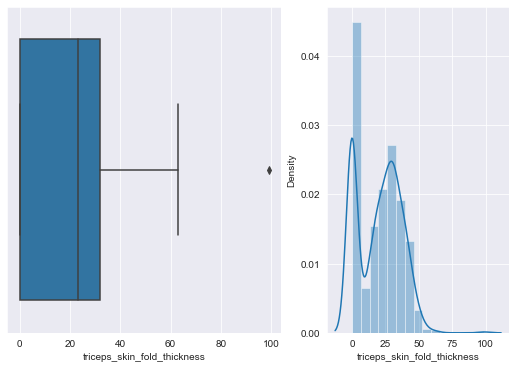

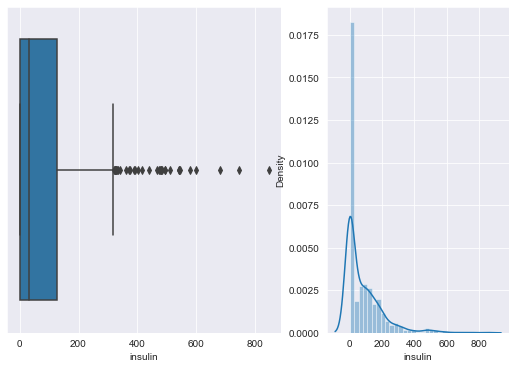

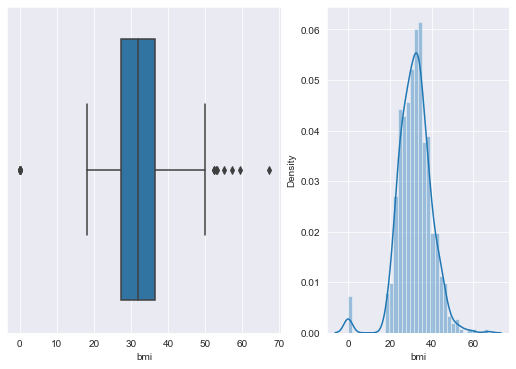

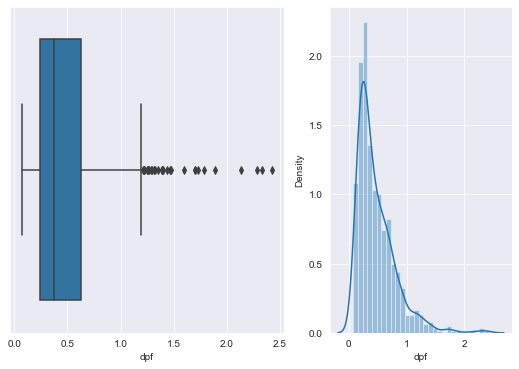

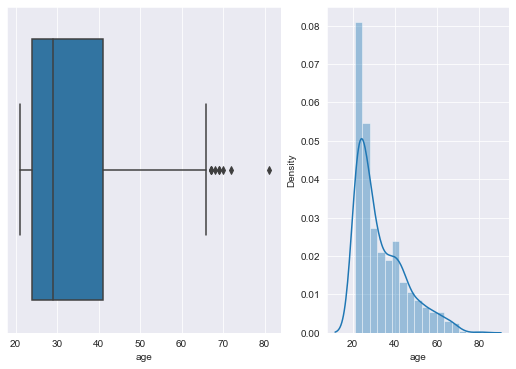

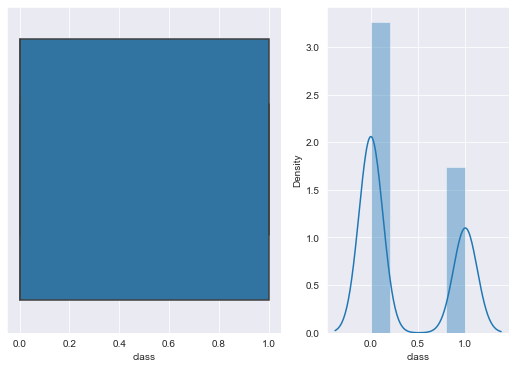

In [25]:
for i in df_diabetes.columns:
    f, axs = plt.subplots(1,2, figsize=(9,6), gridspec_kw=dict(width_ratios=[15,10]))
    sns.boxplot(df_diabetes[i], ax=axs[0])
    sns.distplot(df_diabetes[i], ax=axs[1])

### c) (1 Punkt)

Erklären Sie kurz, warum wir hier das komplette Entfernen der Samples mit fehlenden Werten vermeiden möchten und lieber eine passende Imputationsstrategie wählen.

*Hier ist eine schriftliche Antwort erwartet*

### d) (7 Punkte)

Erstellen Sie ein neues Data Frame und wenden Sie folgenden Strategien an:

* `gtt` und `triceps_skin_fold_thickness`: Imputation mit Median
* `blood_pressure` und `bmi`: Imputation mit Durchschnitt

Stellen Sie am Schluss sicher, dass im neuen Data Frame keine fehlenden Werte mehr vorkommen.

### e) (4 Punkte)

Alternativ können fehlende Werte auch modellbasiert ersetzt werden. Dazu soll ein *k nearest neighbours* (KNN) - Modell verwendet werden (mit `n_neighbours=5`). Verwenden Sie dazu die Klasse `sklearn.impute.KNNImputer` von Scikit-Learn.

Stellen Sie auch hier sicher, dass im neuen Data Frame keine fehlenden Werte mehr vorkommen.

**Hinweis:** Natürlich sollte die Variable \texttt{class} nicht als Grundlage zur Imputation benutzt werden, da sonst Information darüber in die unabhängigen Variablen leakt.

### f) (7 Punkte)

Wir möchten zum Schluss auf dem imputierten Datenset aus Teilaufgabe (e) untersuchen, ob und wie stark Fettleibigkeit zum Diabetesrisiko beiträgt. Erstellen Sie dazu eine neue Spalte `bmi_class` mit der folgenden Einteilung:

$$
\text{bmi_class} = \left\{ \begin{array}{ll}
\text{'underweight'}, & \text{bmi} < 18.5 \\
\text{'normal'}, & 18.5 \leq \text{bmi} < 25 \\
\text{'overweight'}, & 25 \leq \text{bmi} < 30 \\
\text{'obese'}, & \text{bmi} \geq 30 
\end{array}\right.
$$

Die Spalte soll über die Ordinalskala der BMI-Klasse informiert sein.

Berechnen Sie nun das mittlere Diabetesrisiko und die Anzahl der Probanden pro BMI-Klasse. Was ist Ihre Schlussfolgerung?

## Aufgabe 3: Hierarchisch strukturierte Daten (21 Punkte)

Das *Gapminder*-Datenset enthält Daten zum Bruttoinlandprodukt (BIP) pro Kopf (engl. GDP per capita), zur Lebenserwartung (eng. life expectancy) und zur Bevölkerungsgrösse (engl. population) von 142 Ländern auf 5 Kontinenten.

In `gapminder.json` finden Sie ein verschachteltes JSON-Datenset. Dabei ist das oberste Hierarchielevel der Kontinent, das zweitoberste das Land und die relevanten Grössen finden sich schliesslich in der dritten Hierarchiestufe.

### a) (9 Punkte)

Lesen Sie das Json-File als Dictionary ein und bringen Sie es in die Form eines flachen Data Frames:

![image.png](attachment:image.png)

**Hinweis:** Das geht zum Beispiel mit zwei verschachtelten `for`-Loops.

In [104]:
# read data from gapminder.json into a dictionary
with open('gapminder.json') as f:
    gapminder = json.load(f)

continent = list(gapminder.keys())

gdp = []
country = {}
for i in continent:
    list_country = []
    for j in gapminder[i]:
        list_country.append(j)
    country[i] = list_country

gdp = [i for i in gapminder['Africa']['Algeria'].keys()]

list_dict = []
for i in list(country.keys()):
    print(i)
    for j in list(country[i]):
        dict = {}
        dict["continent"] = i
        dict["country"] = j
        for k in gdp:
            dict[k] = gapminder[i][j][k]
        list_dict.append(dict)

Africa
Americas
Asia
Europe
Oceania


[{'continent': 'Africa',
  'country': 'Algeria',
  'gdpPercap_1952': 2449.008185,
  'gdpPercap_1957': 3013.976023,
  'gdpPercap_1962': 2550.81688,
  'gdpPercap_1967': 3246.991771,
  'gdpPercap_1972': 4182.663766,
  'gdpPercap_1977': 4910.416756,
  'gdpPercap_1982': 5745.160213,
  'gdpPercap_1987': 5681.358539,
  'gdpPercap_1992': 5023.216647,
  'gdpPercap_1997': 4797.295051,
  'gdpPercap_2002': 5288.040382,
  'gdpPercap_2007': 6223.367465,
  'lifeExp_1952': 43.077,
  'lifeExp_1957': 45.685,
  'lifeExp_1962': 48.303,
  'lifeExp_1967': 51.407,
  'lifeExp_1972': 54.518,
  'lifeExp_1977': 58.014,
  'lifeExp_1982': 61.368,
  'lifeExp_1987': 65.799,
  'lifeExp_1992': 67.744,
  'lifeExp_1997': 69.152,
  'lifeExp_2002': 70.994,
  'lifeExp_2007': 72.301,
  'pop_1952': 9279525.0,
  'pop_1957': 10270856.0,
  'pop_1962': 11000948.0,
  'pop_1967': 12760499.0,
  'pop_1972': 14760787.0,
  'pop_1977': 17152804.0,
  'pop_1982': 20033753.0,
  'pop_1987': 23254956.0,
  'pop_1992': 26298373.0,
  'pop_1997

In [107]:
# read data from list_dict into a dataframe
df_gapminder = pd.DataFrame.from_dict(list_dict)
df_gapminder

,continent,country,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,...,pop_1962,pop_1967,pop_1972,pop_1977,pop_1982,pop_1987,pop_1992,pop_1997,pop_2002,pop_2007
0,Africa,Algeria,2449.008185,3013.976023,2550.816880,3246.991771,4182.663766,4910.416756,5745.160213,5681.358539,...,11000948.0,12760499.0,14760787.0,17152804.0,20033753.0,23254956.0,26298373.0,29072015.0,31287142,33333216
1,Africa,Angola,3520.610273,3827.940465,4269.276742,5522.776375,5473.288005,3008.647355,2756.953672,2430.208311,...,4826015.0,5247469.0,5894858.0,6162675.0,7016384.0,7874230.0,8735988.0,9875024.0,10866106,12420476
2,Africa,Benin,1062.752200,959.601080,949.499064,1035.831411,1085.796879,1029.161251,1277.897616,1225.856010,...,2151895.0,2427334.0,2761407.0,3168267.0,3641603.0,4243788.0,4981671.0,6066080.0,7026113,8078314
3,Africa,Botswana,851.241141,918.232535,983.653976,1214.709294,2263.611114,3214.857818,4551.142150,6205.883850,...,512764.0,553541.0,619351.0,781472.0,970347.0,1151184.0,1342614.0,1536536.0,1630347,1639131
4,Africa,Burkina Faso,543.255241,617.183465,722.512021,794.826560,854.735976,743.387037,807.198586,912.063142,...,4919632.0,5127935.0,5433886.0,5889574.0,6634596.0,7586551.0,8878303.0,10352843.0,12251209,14326203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,Europe,Switzerland,14734.232750,17909.489730,20431.092700,22966.144320,27195.113040,26982.290520,28397.715120,30281.704590,...,5666000.0,6063000.0,6401400.0,6316424.0,6468126.0,6649942.0,6995447.0,7193761.0,7361757,7554661
138,Europe,Turkey,1969.100980,2218.754257,2322.869908,2826.356387,3450.696380,4269.122326,4241.356344,5089.043686,...,29788695.0,33411317.0,37492953.0,42404033.0,47328791.0,52881328.0,58179144.0,63047647.0,67308928,71158647
139,Europe,United Kingdom,9979.508487,11283.177950,12477.177070,14142.850890,15895.116410,17428.748460,18232.424520,21664.787670,...,53292000.0,54959000.0,56079000.0,56179000.0,56339704.0,56981620.0,57866349.0,58808266.0,59912431,60776238
140,Oceania,Australia,10039.595640,10949.649590,12217.226860,14526.124650,16788.629480,18334.197510,19477.009280,21888.889030,...,10794968.0,11872264.0,13177000.0,14074100.0,15184200.0,16257249.0,17481977.0,18565243.0,19546792,20434176


### b) (9 Punkte)

Bringen Sie nun das Data Frame in die folgende Form:

<img src="attachment:image.png" width="400">

In [153]:
# melt df_gapminder into a dataframe with three columns
df_gapminder_melt = pd.melt(df_gapminder, id_vars=['continent', 'country'], value_vars=gdp)
df_gapminder_melt

,continent,country,variable,value
0,Africa,Algeria,gdpPercap_1952,2.449008e+03
1,Africa,Angola,gdpPercap_1952,3.520610e+03
2,Africa,Benin,gdpPercap_1952,1.062752e+03
3,Africa,Botswana,gdpPercap_1952,8.512411e+02
4,Africa,Burkina Faso,gdpPercap_1952,5.432552e+02
...,...,...,...,...
5107,Europe,Switzerland,pop_2007,7.554661e+06
5108,Europe,Turkey,pop_2007,7.115865e+07
5109,Europe,United Kingdom,pop_2007,6.077624e+07
5110,Oceania,Australia,pop_2007,2.043418e+07


In [154]:
# split column variable into four columns (year and gdp, lifeExp, pop), sep'-'
df_gapminder_melt['year'] = df_gapminder_melt['variable'].str.split('_').str[1]
df_gapminder_melt['gdp'] = df_gapminder_melt['variable'].str.split('_').str[0]
df_gapminder_melt.drop(columns=['variable'], inplace=True)

In [155]:
df_gapminder_melt

,continent,country,value,year,gdp
0,Africa,Algeria,2.449008e+03,1952,gdpPercap
1,Africa,Angola,3.520610e+03,1952,gdpPercap
2,Africa,Benin,1.062752e+03,1952,gdpPercap
3,Africa,Botswana,8.512411e+02,1952,gdpPercap
4,Africa,Burkina Faso,5.432552e+02,1952,gdpPercap
...,...,...,...,...,...
5107,Europe,Switzerland,7.554661e+06,2007,pop
5108,Europe,Turkey,7.115865e+07,2007,pop
5109,Europe,United Kingdom,6.077624e+07,2007,pop
5110,Oceania,Australia,2.043418e+07,2007,pop


In [156]:
# new dataframe where gdp == 'lifeExp', gdp == 'pop'
df_gapminder_melt_lifeExp = df_gapminder_melt[df_gapminder_melt['gdp'] == 'lifeExp']
df_gapminder_melt_pop = df_gapminder_melt[df_gapminder_melt['gdp'] == 'pop']

df_gapminder_melt.drop(columns=['gdp'], inplace=True)
df_gapminder_melt_lifeExp.rename(columns={'value': 'lifeExp'}, inplace=True)
df_gapminder_melt_pop.rename(columns={'value': 'pop'}, inplace=True)
df_gapminder_melt.rename(columns={'value': 'gdp'}, inplace=True)

df_gapminder_melt_lifeExp.drop(columns=['gdp'], inplace=True)
df_gapminder_melt_pop.drop(columns=['gdp'], inplace=True)
df_gapminder_melt

/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,continent,country,gdp,year
0,Africa,Algeria,2.449008e+03,1952
1,Africa,Angola,3.520610e+03,1952
2,Africa,Benin,1.062752e+03,1952
3,Africa,Botswana,8.512411e+02,1952
4,Africa,Burkina Faso,5.432552e+02,1952
...,...,...,...,...
5107,Europe,Switzerland,7.554661e+06,2007
5108,Europe,Turkey,7.115865e+07,2007
5109,Europe,United Kingdom,6.077624e+07,2007
5110,Oceania,Australia,2.043418e+07,2007


In [160]:
# merge dataframes
df_gapminder_melt_lifeExp_pop = pd.merge(df_gapminder_melt_lifeExp, df_gapminder_melt_pop, on=['continent', 'country', 'year'])
df_gapminder_melt_all = pd.merge(df_gapminder_melt, df_gapminder_melt_lifeExp_pop, on=['continent', 'country', 'year'])
df_gapminder_melt_all

0       1952
1       1952
2       1952
3       1952
4       1952
        ... 
5107    2007
5108    2007
5109    2007
5110    2007
5111    2007
Name: year, Length: 5112, dtype: object

### c) (3 Punkte)

Stellen Sie die Entwicklung der durchschnittlichen Lebenserwartung pro Kontinent graphsich dar. Gewichten Sie in der Berechnung des Durchschnitts nach Bevölkerungsgrösse pro Land.

<AxesSubplot:xlabel='year', ylabel='lifeExp'>

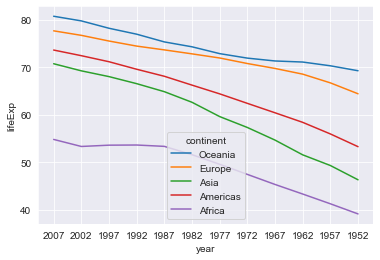

In [165]:
# plot average life expectancy per continent per year and order by population
df_gapminder_ordered = df_gapminder_melt_all.groupby(['continent', 'year']).mean().reset_index().sort_values(by=['continent', 'pop'], ascending=False)
sns.lineplot(x='year', y='lifeExp', hue='continent', data=df_gapminder_ordered)